<a href="https://colab.research.google.com/github/arumugammani02/Task-7/blob/main/Decision_Trees_Assignment15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
#Social_Network_Ads.csv

**Importing the libraries**

In [23]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

**Importing the dataset**

In [24]:
df = pd.read_csv('Social_Network_Ads.csv')

In [25]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [26]:
df=df.drop(columns=["User ID","Gender"])

In [27]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [28]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [29]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


**Splitting the dataset into the Training set and Test set**

In [30]:
X=df.drop(columns=["Purchased"])
y=df.Purchased
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
ss = StandardScaler()

**Feature Scaling**

In [31]:
X_train = ss.fit_transform(X_train)

In [ ]:
X_train

In [33]:
X_test=ss.transform(X_test)

In [ ]:
X_test

In [35]:
y_test

132    0
309    0
341    0
196    0
246    0
      ..
14     0
363    0
304    0
361    1
329    1
Name: Purchased, Length: 80, dtype: int64

**Fitting Decision Tree Classification to the Training set**

In [36]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [37]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [38]:
dtc.score(X_test,y_test)

0.9

**Predicting the Test set results**

In [39]:
y_pred = dtc.predict(X_test)
y_pred


array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1])

**Making the Confusion Matrix**

In [40]:
from sklearn.metrics import confusion_matrix
y_pred = dtc.predict(X_test)
confusion_matrix_1 = confusion_matrix(y_test, y_pred)
y_pred = dtc.predict(X_train)
confusion_matrix_2= confusion_matrix(y_train, y_pred)
print(confusion_matrix_1)
print(confusion_matrix_2)

[[53  5]
 [ 3 19]]
[[199   0]
 [  1 120]]


**Visualising the Training set results**

Text(51.0, 0.5, 'Truth')

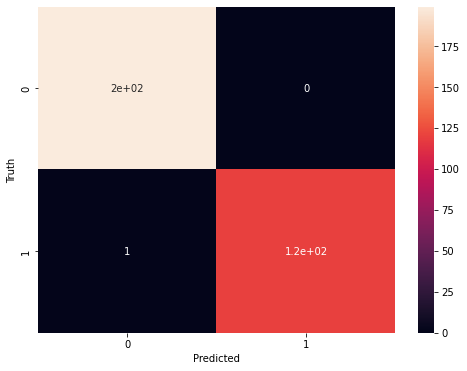

In [41]:
%matplotlib inline

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix_2, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Visualising the Test set results**

Text(51.0, 0.5, 'Truth')

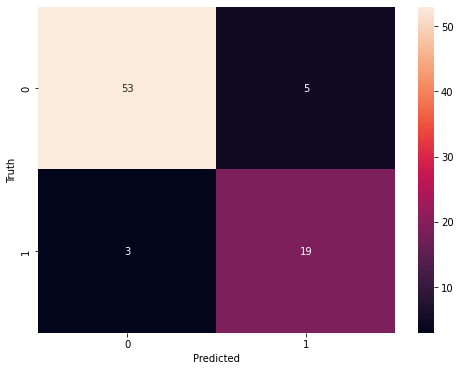

In [42]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix_1, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')